# Домашнее задание 1

__Оценки-баллы__: 
- 1: 1-2
- 2: 3-6
- 3: 7-9
- 4: 10-13
- 5: 14-16
- 6: 17-19
- 7: 20-22
- 8: 23-26
- 9: 27-29
- 10: 30-32

__Литература__: 

- 1) An Introduction to Statistical Learning - облегченная версия следующей книги с небольшим количеством матана, примеры реализованы на R. Электронная версия книги - бесплатная: http://faculty.marshall.usc.edu/gareth-james/

По этой книге также есть онлайн-курс от Стенфорда

- 2)The Elements of Statistical Learning - полный классический учебник по статистическому обучению, много математики. Книга, кстати, тоже бесплатна для скачивания: https://web.stanford.edu/~hastie/ElemStatLearn//


__DL (срок сдачи ДЗ)__: 15.10.2021 23:59. После этого срока работы НЕ будут приниматься

__Формат сдачи - в личный аккаунт telegram: @zhuikov_vv__: hw1_3_ivanov_i_i.ipynb

### Описательные статистики

In [394]:
import pandas as pd
%matplotlib inline 
                                     
import matplotlib
import matplotlib.pyplot as plt

Подгрузим данные и посмотрим на первые пять строчек из таблицы.

In [395]:
# df = pd.read_csv('vk_main.csv', sep='\t')
df = pd.read_csv('../data/hm1_3/vk_main.csv', sep='\t')
df.head()

city country  first_name home_town  in_hse_memes_group  is_bmm  \
0  Москва  Россия  Александра    Москва                True    True   
1  Рязань  Россия   Анастасия    Рязань                True    True   
2  Москва  Россия   Александр      Омск               False    True   
3     NaN     NaN        Анна       NaN               False    True   
4     NaN  Россия     Алексей       NaN                True    True   

   is_closed  last_name  likes_memes        uid  ...  photo_month_mean  \
0      False   Абашкова         60.0  182152789  ...          1.333333   
1      False  Чуфистова          0.0  148020433  ...          2.375000   
2      False  Головачев          0.0  138413935  ...          1.400000   
3      False   Лобанова          0.0  366261055  ...          4.166667   
4      False   Пузырный         21.0  111252392  ...          3.181818   

   photo_repost_cnt  photo_repost_max  photo_repost_mean  photo_repost_median  \
0               0.0               0.0           0.000000                  0.0   
1               2.0               1.0           0.105263                  0.0   
2               0.0               0.0           0.000000                  0.0   
3               0.0               0.0           0.000000                  0.0   
4               0.0               0.0           0.000000                  0.0   

   photo_text_len_cnt  photo_ava_change_cnt  photo_text_url_len_cnt  \
0                 0.0                   0.0                     0.0   
1                 0.0                   0.0                     0.0   
2                 0.0                   0.0                     0.0   
3                 0.0                   0.0                     0.0   
4                 0.0                   0.0                     0.0   

   friends_from_course_cnt  friends_mail_from_course_pct  
0                     42.0                      0.428571  
1                     32.0                      0.281250  
2                     32.0                      0.406250  
3                     45.0                      0.333333  
4                     41.0                      0.341463  

[5 rows x 98 columns]

#### Задание 1 [2]

В переменной `wall_text` лежат тексты со стен всех пользователей.

* Постройте распределение длин для всех стен. 
* Сколько людей написали на своей стенке хотя бы раз название своего вуза?


In [399]:
df['wall_text_length'] = df['wall_text'].fillna("").map(lambda x: len(str(x)))
df['wall_text_length'].describe(include = 'object')

count       425.000000
mean       3771.552941
std       12992.709529
min           0.000000
25%           0.000000
50%          51.000000
75%         900.000000
max      135227.000000
Name: wall_text_length, dtype: float64

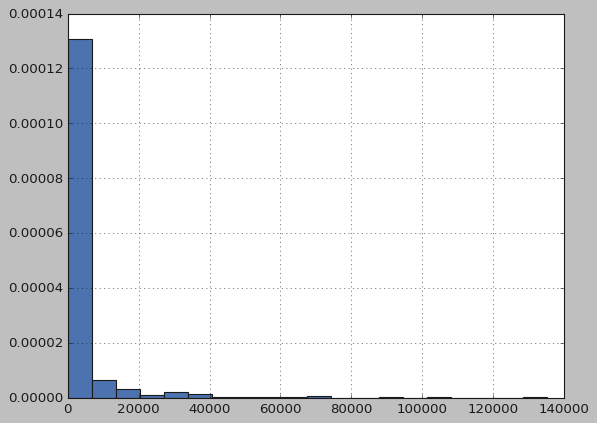

In [406]:
matplotlib.style.use('classic')
df['wall_text_length'].hist(bins=20, density=True)
plt.show()         
# также можно глянуть логарифм
# np.log(df['wall_text_length'] + 1).hist(bins=20, density=True)
# plt.show()         

In [424]:
# Сколько людей написали название своего вуза
hse_names = ['hse', 'вшэ','ВШЭ', 'вышка', 'высшая школа экономики', 'Высшая школа экономики', 'higher school of economics']
times = df.wall_text.astype(str).map(lambda text: any(hse in text.lower() for hse in hse_names)).sum()
print("Количество людей с ВШЭ на странице:", times)

Количество людей с ВШЭ на странице: 10


#### Задание 2 [1]

Вывести имена самых больших любителей мемов (топ 1\% значений по колонке `likes_memes`. Итоговую табличку отсортировать по числу оставленных в группе лайков.

In [425]:
df.likes_memes

0       60.0
1        0.0
2        0.0
3        0.0
4       21.0
       ...  
420      9.0
421     20.0
422      3.0
423    108.0
424      6.0
Name: likes_memes, Length: 425, dtype: float64

In [431]:
q = df.likes_memes.quantile(0.99)
likes_memes_top1 = list(df.likes_memes[df.likes_memes>=q].index)
df['first_name'][df.likes_memes[df.likes_memes>q].index]

134       Полина
189        Данил
205    Александр
363       Николь
Name: first_name, dtype: object

134       Полина
189        Данил
205    Александр
363       Николь
Name: first_name, dtype: object

In [432]:
df[df.likes_memes >= q][['first_name','likes_memes', 'photo_like_cnt']].sort_values('photo_like_cnt')

first_name  likes_memes  photo_like_cnt
134     Полина       1081.0            18.0
205  Александр        440.0           209.0
189      Данил        398.0          2013.0
363     Николь        685.0          2954.0

#### Задание 3 [1]

Построить гистограммы для параметров `wall_emoji_cnt` (число эмодзи на стене у человека) и `wall_comment_cnt` (число коментов на стене у человека). Где больше выбросов?

array([[<AxesSubplot:title={'center':'wall_comment_cnt'}>,
        <AxesSubplot:title={'center':'wall_emoji_cnt'}>]], dtype=object)

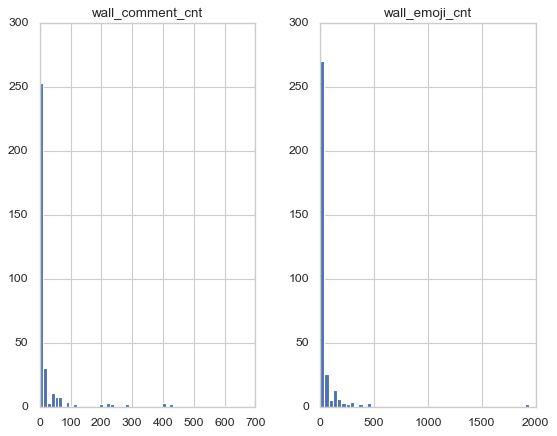

In [441]:
# df['wall_emoji_cnt'].hist(bins=20, density=True)
columns = ['wall_comment_cnt', 'wall_emoji_cnt']
df[columns].hist(bins=50)

In [435]:
#для понимания выбросов построим ящик с усами
import seaborn as sns
sns.set()
for col in columns:
    plt.figure(figsize=(10,5)) 
    sns.set_style("whitegrid") 
    ax1 = sns.boxplot(x=df[col])

In [445]:
# то есть правая черта на первом графике это 1.5 значения 75% , найдем границы
right_border_emoji = 1.5*21.5
right_border_comment = 1.5*14
number_emission_emoji_list = len(list(df.wall_emoji_cnt[df.wall_emoji_cnt>right_border_emoji]))
print('number_emission_emoji is', number_emission_emoji_list)

number_emission_comment = len(list(df.wall_comment_cnt[df.wall_comment_cnt>right_border_comment]))
print('number_emission_comment is', number_emission_comment)
print("У эмодзи больше выбросов")
df[columns].describe()

number_emission_emoji is 74
number_emission_comment is 66


wall_comment_cnt  wall_emoji_cnt
count        343.000000      343.000000
mean          29.632653       62.909621
std           84.781448      226.657483
min            0.000000        0.000000
25%            0.000000        0.000000
50%            0.000000        2.000000
75%           14.000000       21.500000
max          601.000000     1975.000000

Сравните для обоих показателей средние с медианами. Какие выводы о хвостах распределений и выборосах можно сделать из этого сравнения?

In [153]:
df[columns].describe()
print("median\n",df[columns].median())
print("mean\n", df[columns].mean())
#медианные значения очень близки к нулю, это значит, 
#что большинство людей не хранят эмоцзи или комменты на своих стенах, 
#а следовательно нужно искать более подходящий способ поиска выбросов

# у эмодзи больше разница между средним и медианным, а след-но и больше выбросова

median
 wall_comment_cnt    0.0
wall_emoji_cnt      2.0
dtype: float64
mean
 wall_comment_cnt    29.632653
wall_emoji_cnt      62.909621
dtype: float64


#### Задание 4 [1]

Посчитайте соотношение полов в направлениях по маркетингу и менеджменту (`is_bmm` - с маркетинга - $1$, с менеджмента - $0$). Проинтерпретируйте итоговые показатели. Где больше парней? Во сколько раз? 

In [156]:
males_marketing = 0
females = 0 
df[['male_dummy', 'first_name', 'is_bmm']]

male_dummy  first_name  is_bmm
0             0  Александра    True
1             0   Анастасия    True
2             1   Александр    True
3             0        Анна    True
4             1     Алексей    True
..          ...         ...     ...
420           0        Юлия   False
421           1        Илья   False
422           1   Александр   False
423           1        Глеб   False
424           0       Злата   False

[425 rows x 3 columns]

In [161]:
df_female = df[df.male_dummy == 0]
df_female[['male_dummy', 'first_name', 'is_bmm']]
df_male = df[df.male_dummy == 1]
df_male[['male_dummy', 'first_name', 'is_bmm']]


male_dummy  first_name  is_bmm
2             1   Александр    True
4             1     Алексей    True
5             1  Александер    True
9             1     Николай    True
18            1      Danial    True
..          ...         ...     ...
416           1        Янис   False
419           1        Паша   False
421           1        Илья   False
422           1   Александр   False
423           1        Глеб   False

[195 rows x 3 columns]

In [169]:
df_male.is_bmm.value_counts()

False    145
True      50
Name: is_bmm, dtype: int64

In [170]:
df_female.is_bmm.value_counts()

False    118
True     112
Name: is_bmm, dtype: int64

In [447]:
print(112/(112+50), '- процентное отношение девочек на маркетинге')
print(50/(112+50), '- процентное отношение мальчиков на маркетинге')
print(145/(145+118),'- процентное отношение девочек на менеджементе')
print(118/(145+118) ,'- процентное отношение мальчиков на менеджменте')
print('Парней больше на менеджменте в ',145/118)

0.691358024691358 - процентное отношение девочек на маркетинге
0.30864197530864196 - процентное отношение мальчиков на маркетинге
0.5513307984790875 - процентное отношение девочек на менеджементе
0.44866920152091255 - процентное отношение мальчиков на менеджменте
Парней больше на менеджменте в  1.228813559322034


#### Задание 5 [2]

Каждый студент добавляет к себе в друзья людей со своего потока. В переменной `friends_mail_from_course_pct` записана доля парней-друзей с потока (то, что переменная называется не `male` - опечатка).

Постройте гистограмму для распределения доли парней в друзьях для девушек и для парней. Обе гистограммы постройте на одной картинке. 

In [177]:
df['friends_femail_from_course_pct'] = 1 - df['friends_mail_from_course_pct']
df.friends_mail_from_course_pct.hist(bins=20, density=True)
df['friends_femail_from_course_pct'].hist(bins=20, density=True)

<AxesSubplot:>

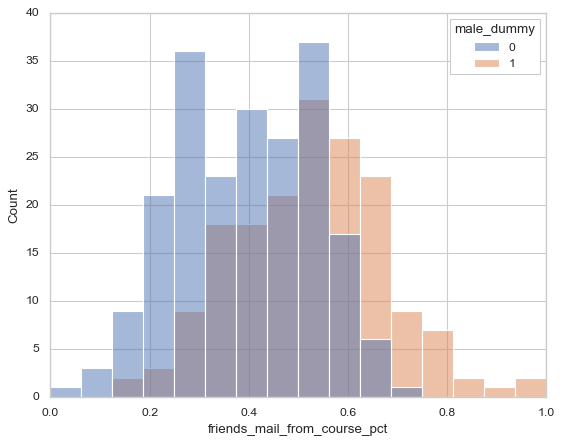

In [448]:
sns.histplot(data=df, x='friends_mail_from_course_pct', hue='male_dummy')
plt.show()

Посчитайте для обеих групп среднее и дисперсию. Какие выводы вы можете сделать на основе посчитанных статистик?

In [451]:
df.groupby('male_dummy')['friends_mail_from_course_pct'].describe().loc[:, ['mean', 'std']]
# у парней доля парней друзей с потока больше, значит парни больше дружат с парнями
# дисперсии практически одинаковы 

mean       std
male_dummy                    
0           0.391522  0.140071
1           0.523007  0.153287

#### Задание 6 [3]

Давайте проанализируем колонку со средним кол-во фото в месяц (`photo_month_mean`)

* Постройте на одной картинке гистограмы для распределения этого показателя по разным полам. 
* Правда ли, что типичная девушка выкладывает значительно больше фотографий, чем типичный мужчина? (подумайте какой именно показатель типичности нужно выбрать для сравнения и обоснуйте почему)
* Для какого пола показатель оказывается более непредсказуемым? (подумайте как именно корректно эту непредсказуемость оценить, обычное стандартное отклонение явно не подходит)

Не забывайте подгрузить пакет `matplotlib`!  Все свои рассуждения пишите прямо по ходу кода

<AxesSubplot:xlabel='photo_month_mean'>

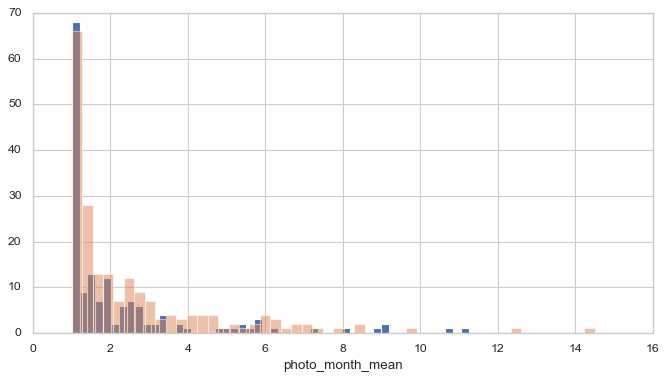

In [459]:
df['photo_male'] = df.photo_month_mean[df.male_dummy == 1]
df['photo_female'] = df.photo_month_mean[df.male_dummy == 0]

plt.figure(figsize=(10,5)) #создаем поле для рисования

plt.xlabel("photo_month_mean")
# pl.ylabel("Individuals")
df['photo_male'][df['photo_male']<15].hist(bins=50)
df['photo_female'][df['photo_female']<15].hist(bins=50,  alpha=0.5)

In [190]:
df.photo_month_mean
df[['photo_male','photo_female']].describe() 

photo_male  photo_female
count  167.000000    209.000000
mean     4.040629      4.453513
std     11.327306     14.076101
min      1.000000      1.000000
25%      1.000000      1.000000
50%      1.500000      1.750000
75%      2.683333      3.333333
max    131.416667    151.833333

In [194]:
df[['photo_male','photo_female']].median()

photo_male      1.50
photo_female    1.75
dtype: float64

1. Правда ли, что типичная девушка выкладывает значительно больше фотографий, чем типичный мужчина? (подумайте какой именно показатель типичности нужно выбрать для сравнения и обоснуйте почему)

Нет, если типичная девушка - те, у которых квартиль больше 75%, то они несильно отличаются от мужчин
Максимальные значения также приблизительно равны. Видимо, женщины своими фотографиями просто привлекают больше внимания:)

2. Для какого пола показатель оказывается более непредсказуемым? (подумайте как именно корректно эту непредсказуемость оценить, обычное стандартное отклонение явно не подходит)

Значения квартильно 75% зависит от кол-ва тех и тех, а так как девушек больше, то нужно уравнивать данные, чтобы оценить непредсказуемость.  

<!-- # Правда ли, что типичная девушка выкладывает значительно больше фотографий, чем типичный мужчина? (подумайте какой именно показатель типичности нужно выбрать для сравнения и обоснуйте почему)
# По данным мы видим, что нет. Если считать типичных девушек, квартиль которых больше 75%, то они несильно отличаются от мужчин 
# А

# Для какого пола показатель оказывается более непредсказуемым? (подумайте как именно корректно эту непредсказуемость оценить, обычное стандартное отклонение явно не подходит) -->

### Визуализация

У всех нас есть датасет по контакту. В нём лежит информация про всех нас. Эту информацию надо как следует проанализировать. 

В большинстве заданий для получения баллов придётся не только завести код, но и написать свои мысли в поле Ответ. Сочинения надо писать прямо в текстовых ячейках, сразу после слова Ответ.

Для начала подгрузите все необходимые библиотеки: math, numpy, pandas, matplotlib.pyplot, seaborn и включите опцию, отвечающую за прорисовку картинок прямо в тетрадке.

In [462]:
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Подгрузите данные профилей и данные по фотографиям

In [466]:
# В этой табличке лежат данные по профилю человека
df_profile = pd.read_csv('../data/hm1_3/vk_data_profile.csv',sep='\t')
# df_profile = pd.read_csv('vk_data_profile.csv',sep='\t')

# В этой табличке лежат данные по фотографиям человека
df_photo = pd.read_csv('../data/hm1_3/vk_data_photo.csv',sep='\t')
# df_photo = pd.read_csv('vk_data_photo.csv',sep='\t')

Склеим табличку по полю uid

In [467]:
df = pd.merge(df_profile, df_photo, how='right', on='uid')
df.head()

Unnamed: 0_x        uid  Unnamed: 0.1  first_name  last_name  is_closed  \
0             0  182152789             0  Александра   Абашкова      False   
1             1  148020433             1   Анастасия  Чуфистова      False   
2             2  138413935             2   Александр  Головачев      False   
3             3  366261055             3        Анна   Лобанова      False   
4             4  111252392             4     Алексей   Пузырный      False   

     city home_town  male_dummy         relation_cat  ... photo_repost_cnt  \
0  Москва    Москва           0           не указано  ...              0.0   
1  Рязань    Рязань           0           не указано  ...              2.0   
2  Москва      Омск           1  не женат/не замужем  ...              0.0   
3     NaN       NaN           0           не указано  ...              0.0   
4     NaN       NaN           1                  NaN  ...              0.0   

   photo_repost_max  photo_repost_mean  photo_repost_median  \
0               0.0           0.000000                  0.0   
1               1.0           0.105263                  0.0   
2               0.0           0.000000                  0.0   
3               0.0           0.000000                  0.0   
4               0.0           0.000000                  0.0   

                                          photo_text  photo_text_len_cnt  \
0                                                                    0.0   
1                                                                    0.0   
2                                                                    0.0   
3                                                                    0.0   
4                                                                    0.0   

   photo_yer_mean  vk_photo_ava_change_cnt  vk_photo_text_url_len_cnt  \
0        1.333333                      0.0                        0.0   
1        3.166667                      0.0                        0.0   
2        2.333333                      0.0                        0.0   
3       12.500000                      0.0                        0.0   
4        8.750000                      0.0                        0.0   

   vk_photo_wall_ph_post_cnt  
0                        0.0  
1                        0.0  
2                        0.0  
3                        0.0  
4                        0.0  

[5 rows x 85 columns]

Давайте посмотрим на все названия колонок, которые есть в таблице.

In [468]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 425 entries, 0 to 424
Data columns (total 85 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0_x                     425 non-null    int64  
 1   uid                              425 non-null    int64  
 2   Unnamed: 0.1                     425 non-null    int64  
 3   first_name                       425 non-null    object 
 4   last_name                        425 non-null    object 
 5   is_closed                        425 non-null    bool   
 6   city                             328 non-null    object 
 7   home_town                        112 non-null    object 
 8   male_dummy                       425 non-null    int64  
 9   relation_cat                     193 non-null    object 
 10  relation_partner                 10 non-null     object 
 11  byear                            154 non-null    float64
 12  bmonth                

Мы видим, что часть из них кончается на `cnt`. Это колонки-счётчики. В них лежат такие переменные как количество фоток, лайков, репостов и тд

In [469]:
variables_cnt= [item for item in df.columns if item[-3:] == 'cnt']
variables_cnt

['folowers_cnt',
 'albums_cnt',
 'audio_cnt',
 'followers_cnt',
 'friends_cnt',
 'gifts_cnt',
 'groups_cnt',
 'mutual_friends_cnt',
 'photos_cnt',
 'subscriptions_cnt',
 'user_photos_cnt',
 'videos_cnt',
 'pages_cnt',
 'lang_cnt',
 'change_city_school_cnt',
 'schools_cnt',
 'photo_cnt',
 'photo_like_cnt',
 'photo_repost_cnt',
 'photo_text_len_cnt',
 'vk_photo_ava_change_cnt',
 'vk_photo_text_url_len_cnt',
 'vk_photo_wall_ph_post_cnt']

Разбиритесь как работает и устроен этот цикл, если вы ещё не разбираетесь. Почитать об этом можно [вот тут.](https://habr.com/ru/post/30232/) Чуть ниже вам предстоит написать свой такой. 

#### Задание 7 [2]

Вытащите из переменных счётчиков только те, которые отвечают за фото.__ Постройте для них гистограммы (для удобства используйте логарифмическое скалирование). Как думаете, в каких переменных есть выбросы? Какие из переменных неинформативны? Почему?


__Ответ:__

In [470]:
photots_cnt

['folowers_cnt',
 'albums_cnt',
 'audio_cnt',
 'followers_cnt',
 'friends_cnt',
 'gifts_cnt',
 'groups_cnt',
 'mutual_friends_cnt',
 'photos_cnt',
 'subscriptions_cnt',
 'user_photos_cnt',
 'videos_cnt',
 'pages_cnt',
 'lang_cnt',
 'change_city_school_cnt',
 'schools_cnt',
 'photo_cnt',
 'photo_like_cnt',
 'photo_repost_cnt',
 'photo_text_len_cnt',
 'vk_photo_ava_change_cnt',
 'vk_photo_text_url_len_cnt',
 'vk_photo_wall_ph_post_cnt']

In [322]:
# photots_cnt = [item for item in variables_cnt if item.find("photo", 1)] не работатет(

In [477]:
photos_var_cnt = ['photos_cnt','user_photos_cnt', 'photo_cnt', 'photo_like_cnt']  
photos_var_cnt

['photos_cnt', 'user_photos_cnt', 'photo_cnt', 'photo_like_cnt']

array([[<AxesSubplot:title={'center':'photos_cnt'}>,
        <AxesSubplot:title={'center':'user_photos_cnt'}>],
       [<AxesSubplot:title={'center':'photo_cnt'}>,
        <AxesSubplot:title={'center':'photo_like_cnt'}>]], dtype=object)

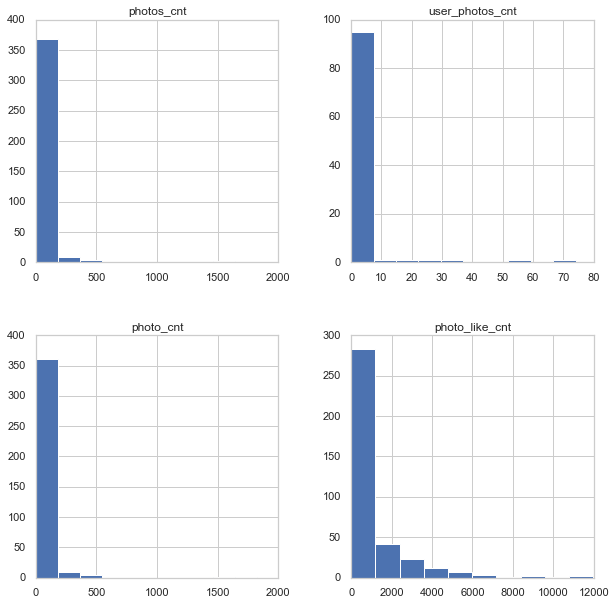

In [478]:
df[photos_var_cnt].hist(figsize=(10,10))

array([[<AxesSubplot:title={'center':'photos_cnt'}>,
        <AxesSubplot:title={'center':'user_photos_cnt'}>],
       [<AxesSubplot:title={'center':'photo_cnt'}>,
        <AxesSubplot:title={'center':'photo_like_cnt'}>]], dtype=object)

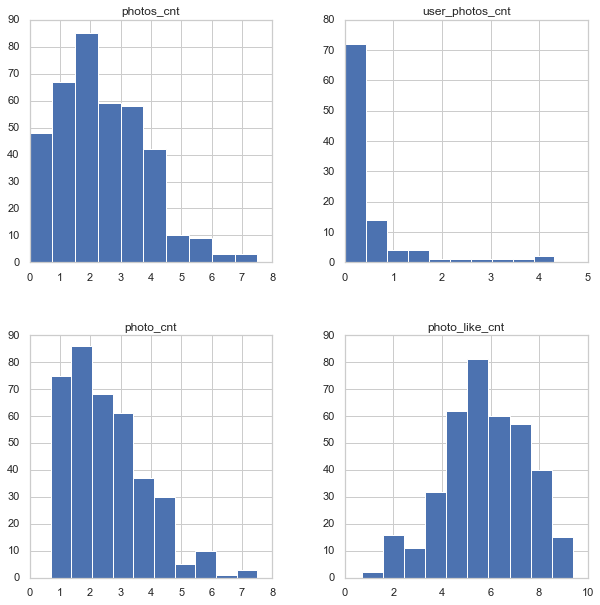

In [479]:
np.log(1+df[photos_var_cnt]).hist(figsize=(10,10))
# .hist(figsize=(15,12))

### Как думаете, в каких переменных есть выбросы? Какие из переменных неинформативны? Почему?
По их значениям 'photo_repost_cnt', 'photo_text_len_cnt', 'vk_photo_ava_change_cnt', 'vk_photo_text_url_len_cnt', 'vk_photo_wall_ph_post_cnt' не информативные 
### Чтобы найти выбросы построем ящики с усами, проверим для фич photos_cnt и uset_photos_cnt

user_photos_cnt    photo_cnt
count       101.000000   376.000000
mean          2.504950    41.840426
std          10.142607   156.309611
min           0.000000     1.000000
25%           0.000000     3.000000
50%           0.000000     8.000000
75%           1.000000    27.000000
max          74.000000  1822.000000

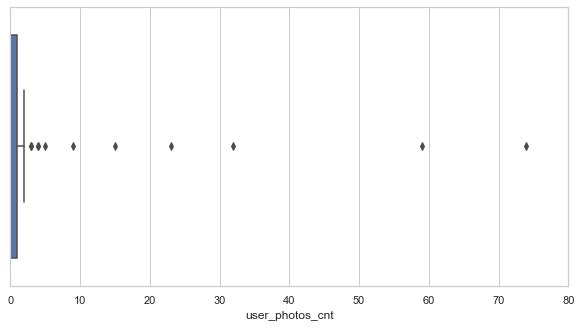

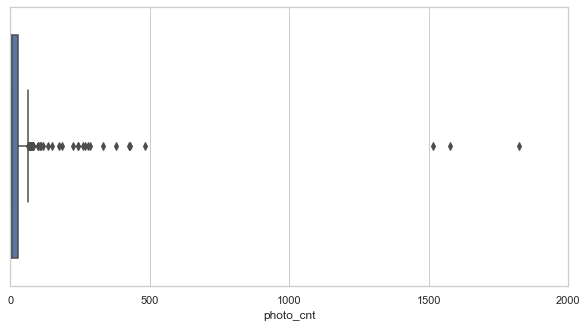

In [485]:
sns.set()
columns = ['user_photos_cnt', 'photo_cnt']
for col in columns:
    plt.figure(figsize=(10,5)) 
    sns.set_style("whitegrid") 
    ax1 = sns.boxplot(x=df[col])
df[columns].describe()    

In [328]:
# думаю и там, и там некоторые элементы можно назвать выбросами

#### Задание 8 [2]

Кто больше постит фотографий, девушки или парни? чьи фото собирают больше лайков? (общее количество лайков, медиана и среднее)

Вы уже до этого искали ответы на подобные вопросы. Тут от вас требуется построить картинку, на которй будет чётко видно что происходит с женщинами, а что с мужчинами (своя гистограмма для каждой фичи раскрашенная по мужчинам и женщинам). Попробуйте построить все $4$ картинки в рамках одной с помощью `axis`.

In [489]:
photos_var_cnt = [с]
df_male = df[df.male_dummy == True]
df_female = df[df.male_dummy == False]


In [490]:
fig, axs = plt.subplots(4, figsize=(10, 20))
for i, feature in enumerate(photos_var_cnt):
    axs[i].hist([df_male[feature], df_female[feature]], bins=20, label=['male', 'female'])
    axs[i].title.set_text(feature)
    axs[i].legend()

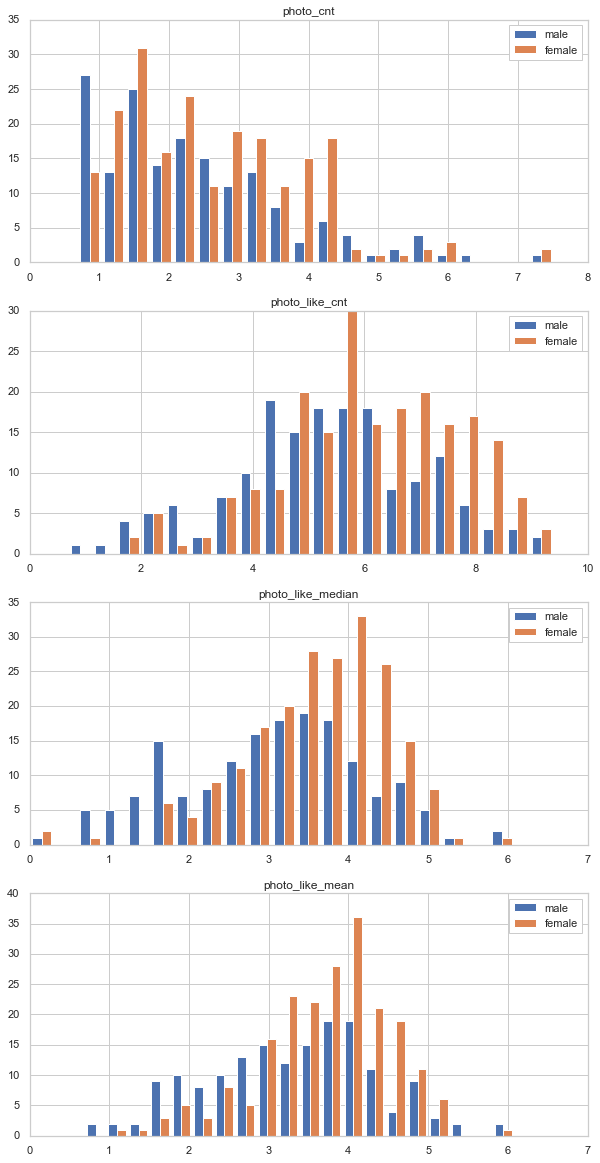

In [491]:
# и с логарифмом
fig, axs = plt.subplots(4, figsize=(10, 20))
for i, feature in enumerate(photos_var_cnt):
    axs[i].hist([np.log(1+df_male[feature]), np.log(1+df_female[feature])], bins=20, label=['male', 'female'])
    axs[i].title.set_text(feature)
    axs[i].legend()

In [17]:
# примерно такая картинка должна получиться

C:\Users\VLADIMIR\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


Давайте добавим к нашим переменным (описывающим фотографии) количество друзей, количество подарков и пол

In [492]:
vars_interesting = photos_var_cnt + ['male_dummy', 'friends_cnt', 'gifts_cnt']

In [493]:
df[vars_interesting].head()

photo_cnt  photo_like_cnt  photo_like_median  photo_like_mean  male_dummy  \
0        4.0           309.0               72.0        77.250000           0   
1       19.0          2894.0              152.0       152.315789           0   
2        7.0          2406.0              328.0       343.714286           1   
3       50.0          1310.0               25.0        26.200000           0   
4       35.0          1375.0               19.0        39.285714           1   

   friends_cnt  gifts_cnt  
0        298.0        NaN  
1        408.0      203.0  
2       2969.0        NaN  
3        214.0       24.0  
4        336.0      227.0

#### Задание 9 [2]

Визуализируйте вытащенные признаки попарно. Постройте `pairplot` для всех пар. На диагонали расположите оценки плотностей для признаков. Для этого используйте опцию `diag_kind = 'kde'`. С помощью параметра `hue` разбейте все наблюдения на мужские и женские, чтобы они отражались на картинках разными цветами.

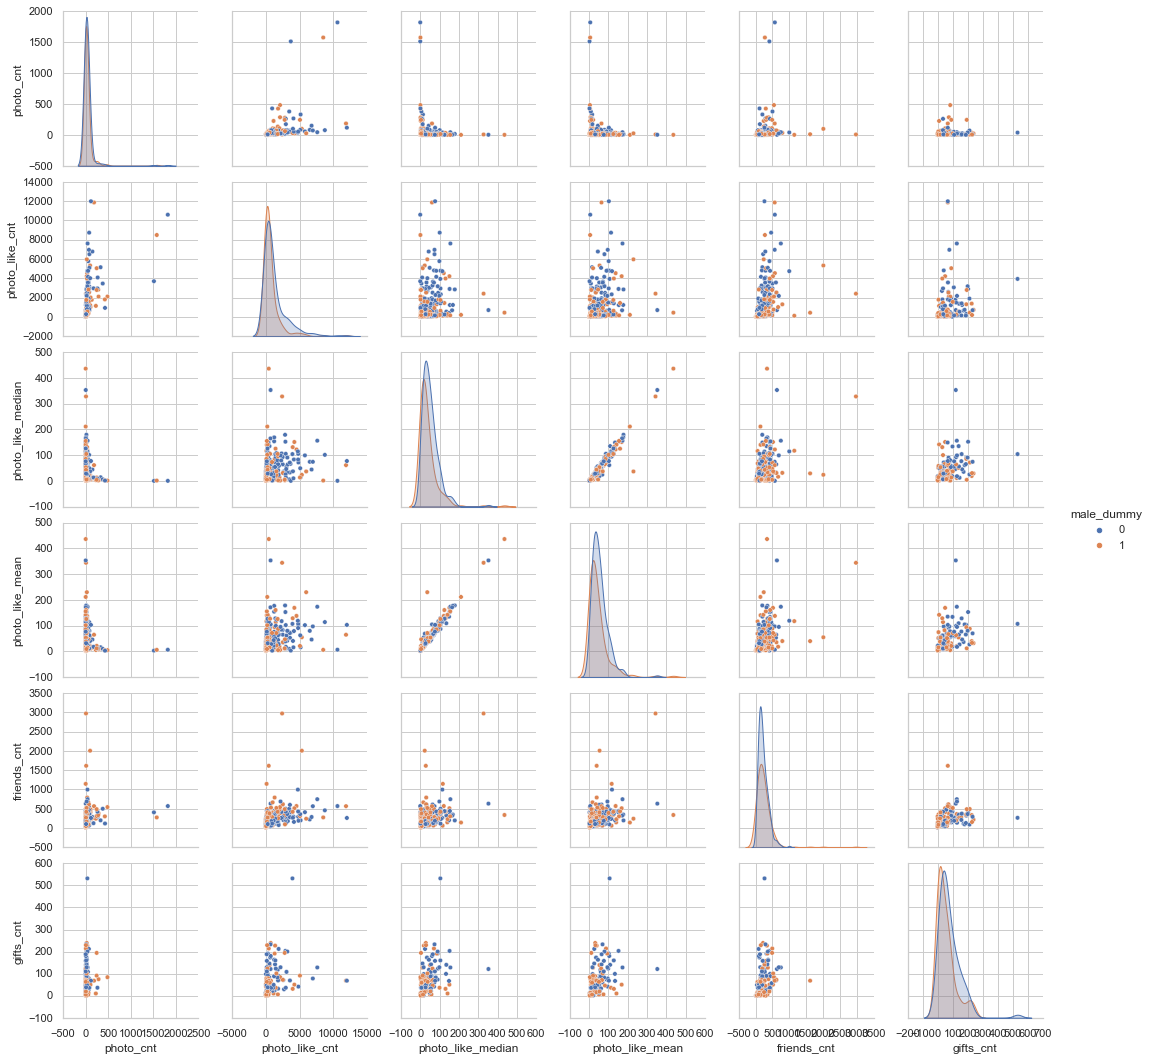

In [494]:
sns.pairplot(df[vars_interesting], height = 2.5, kind = 'scatter', diag_kind = 'kde', hue = 'male_dummy');

Давайте для удобства визуализации прологарифмуем наш датасет (предварительно заполнив пропуски нулями или выкинув их)

In [495]:
df_na_zero = df[vars_interesting].fillna(0)

for column in df_na_zero.columns:
    if column == 'male_dummy':
        continue
    df_na_zero[column] = df_na_zero[column].map(lambda x: math.log(1 + x))
    

# постройте pairplot для датасета df_na_zero

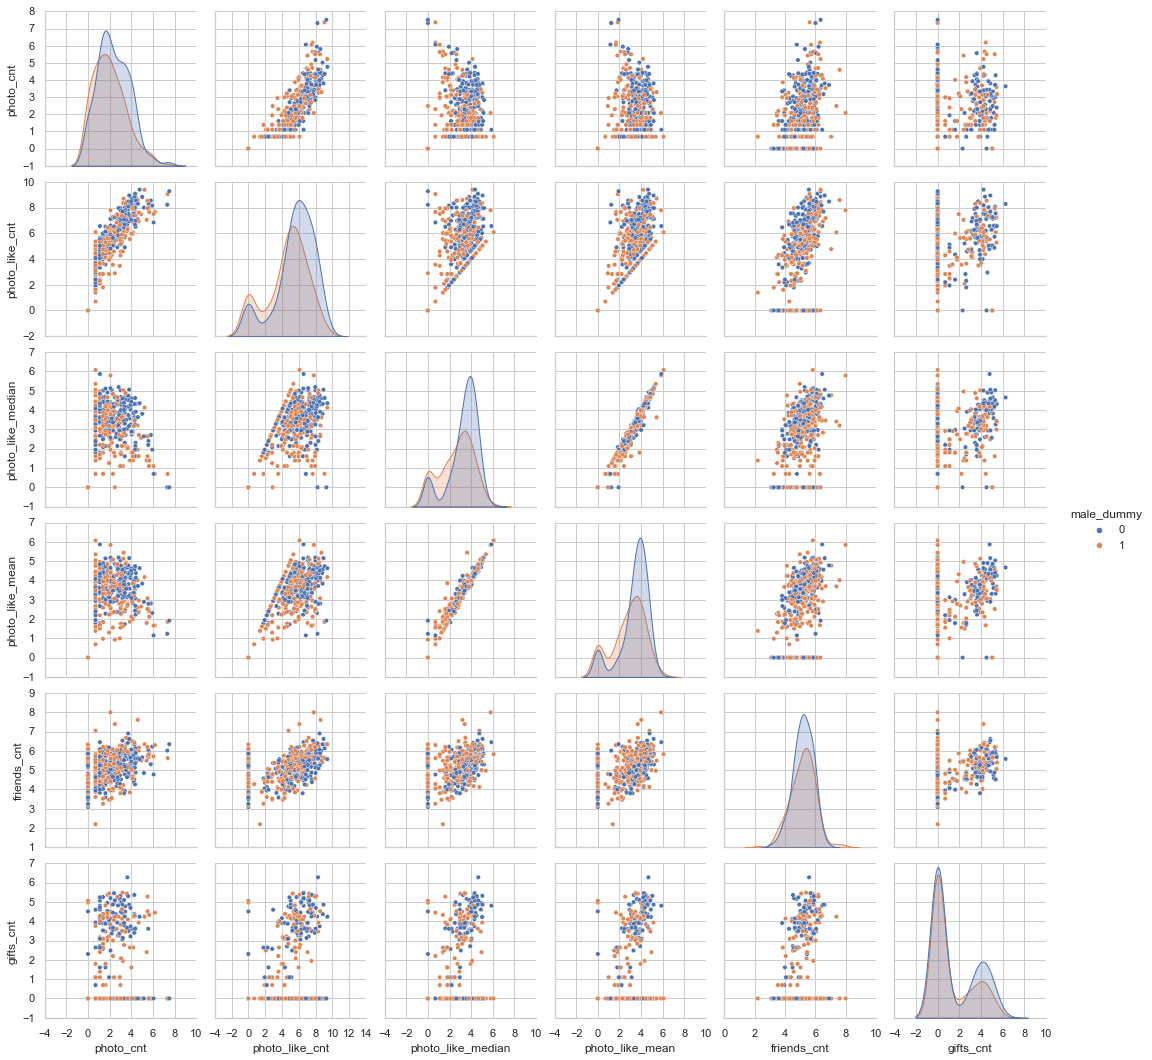

In [496]:
sns.pairplot(df_na_zero, height = 2.5, kind = 'scatter', diag_kind = 'kde', hue = 'male_dummy');

#### Задание 10 [1]

Сделайте датасет df_na_drop. Для этого проделайте всё то же самое, что выше, но вместо того, чтобы заполнять пропуски нулями - выбросите их.

In [497]:
# создание датасета для df_na_drop
df_na_drop = df[vars_interesting].dropna()

for column in df_na_drop.columns:
    if column == 'male_dummy':
        continue
    df_na_drop[column] = df_na_zero[column].map(lambda x: math.log(1 + x))
# постройте pairplot для датасета df_na_drop

In [498]:
print(df[vars_interesting].shape, df_na_drop.shape)

(425, 7) (162, 7)


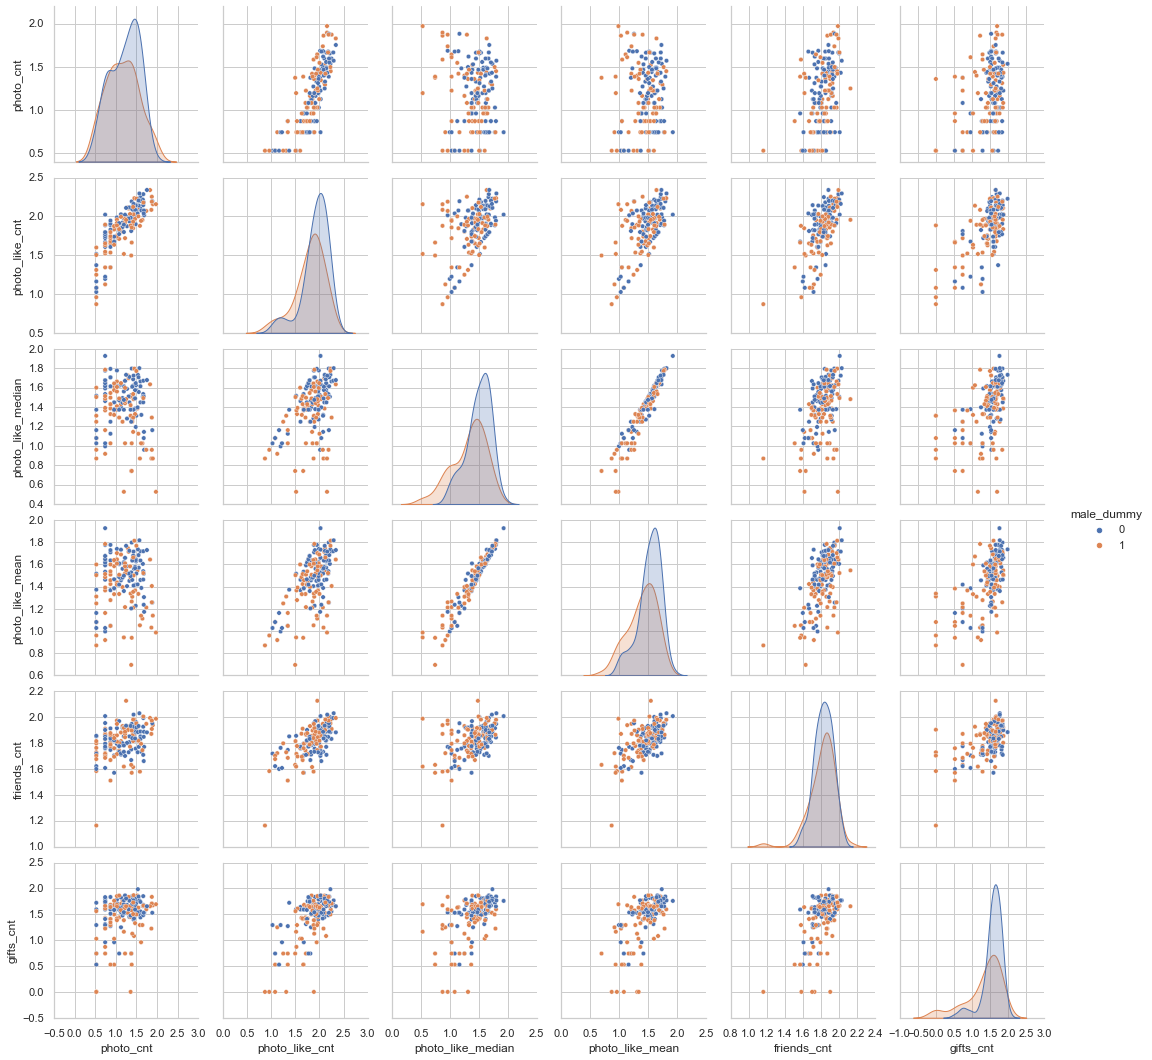

In [499]:
sns.pairplot(df_na_drop, height = 2.5, kind = 'scatter', diag_kind = 'kde', hue = 'male_dummy');

#### Задание 11 [3]

Дайте ответы на следущие вопросы. Свои мысли пишите прямо здесь! 

* Между какими признаками скорее всего есть линейная зависимость? Почему вы так решили? 

__Ответ:__   photo_like_median и photo_like_mean имеют линейную зависимость

* Eсть ли тут нелинейные зависимости?

__Ответ:__   да, те, которые становятся похожими на линейные после логарифмического преобразования(но не были линейными). Например, photo_cnt&photo_like_cnt ,friends_cnt&photo_cnt и тд.

* Есть ли объекты-выбросы, которые наблюдаются далеко от сгустков из точек. 

__Ответ:__  да, есть выбросы в далеке от кучностей

* Какие ещё интересные особенности вы видите на картинке?

__Ответ:__  

* Удаление строк работает лучше, чем заполнение нулями - оно и понятно, почему
* Многие распределения похожи на нормальные и друг на друга



#### Задание 12 [2]

Отлично! Половина домашки осталась позади. Давайте теперь для тех же самых признаков построим матрицу корреляций и провизуализируем её с помощью `heatmap`.

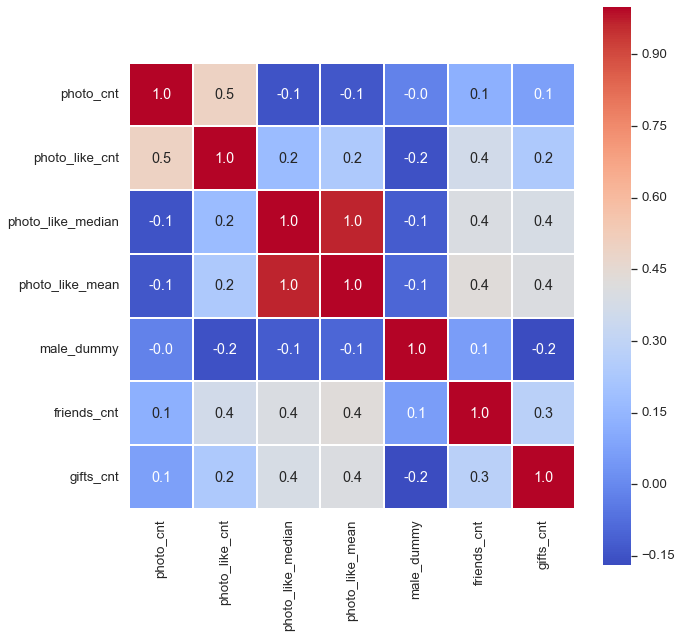

In [506]:
# Тут нужна картинка для датасета df[vars_interesting]
sns.set(font_scale=1.2)
plt.subplots(figsize=(10, 10))
sns.heatmap(df[vars_interesting].corr(method='pearson'),
            square = True, 
            annot = True, 
            fmt=".1f", 
            linewidths=0.1, 
            cmap="coolwarm");

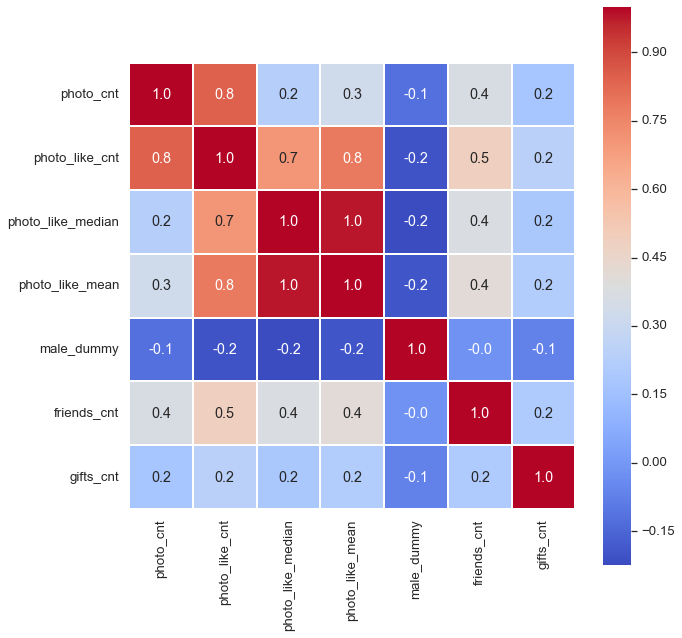

In [507]:
# Тут нужна картинка для датасета df_na_zero[vars_interesting]
sns.set(font_scale=1.2)
plt.subplots(figsize=(10, 10))
sns.heatmap(df_na_zero[vars_interesting].corr(method='pearson'),
            square = True, 
            annot = True, 
            fmt=".1f", 
            linewidths=0.1, 
            cmap="coolwarm");

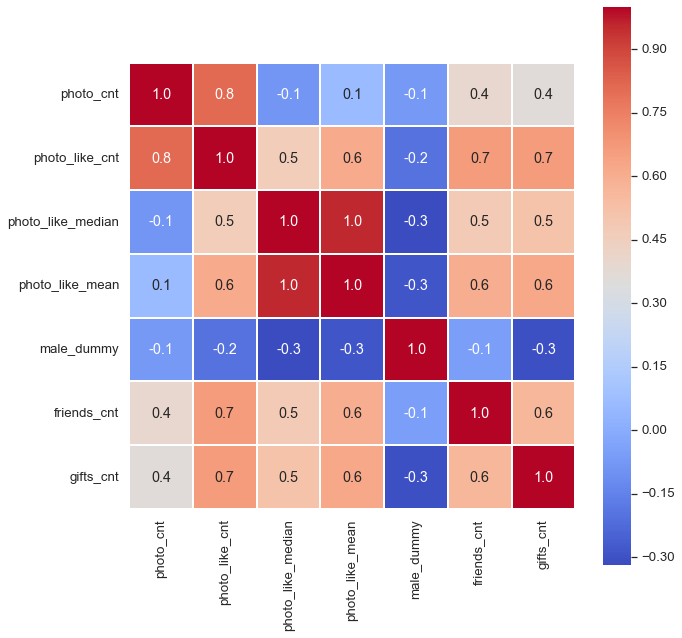

In [508]:
# Тут нужна картинка для датасета df_na_drop[vars_interesting]
sns.set(font_scale=1.2)
plt.subplots(figsize=(10, 10))
sns.heatmap(df_na_drop[vars_interesting].corr(method='pearson'),
            square = True, 
            annot = True, 
            fmt=".1f", 
            linewidths=0.1, 
            cmap="coolwarm");

#### Задание 13 [2]

Насколько сильно корреляционные матрицы различаются между собой? Почему? 

__Ответ:__ Логарифмированная матрица и не лог. сильно различается, это связано с нелинейные преобразованием и тем, что оно подчеркивает. На первой сильно видна линейная зависимость, вторые две выражают и степень нелинейной зависимости. Что интересно, есть значения, которые +- не меняются, а также те, которые улучшаются за счет использования dropna

#### Задание 14 [2]

Между какими переменными корреляция самая высокая? Почему? Она отрицательная или положительная. Прокомментируйте все клетки, где она оказалась $\ge 0.3$ либо $\le -0.2$. 

__Ответ:__ 
Будем смотреть на последнюю таблицу

Корреляция <= -0.2 для пары male_dummy с photo_like, photo_like_median, photo_like_mean, gifts_cnt. Показывает насколько сильно данные зависят от пола

Корреляция >= 0.3 для пересечений признаков ['friends_cnt', gifts_cnt'] с другими. 
А также 'photo_cnt'&'photo_like_cnt'. Чем больше, тем сильнее выражена линейная зависимость у логарифма.

#### Задание 15 [2]

Дамми-переменная это переменная, которая принимает два значения. Либо $1$, если человек обладает закодированным в ней свойством, либо $0$, если не обладает. В нашей таблице все дамми-переменные оканчиваются на суффикc `dummy`.  

Возьмите переменную `instagram_dummy`. Она принимает значение $1$, если у пользователя на страничке есть ссылка на инстаграм. Возьмите переменную `male_dummy`. Она примает значение $1$, если пользователь парень. Постройте картинку, на которой будет видно как между собой соотносятся владельцы инстаграмма по полу. 

<AxesSubplot:>

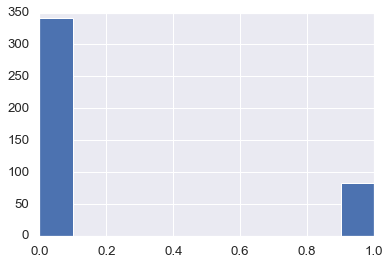

In [351]:
df.instagram_dummy.hist()

male_dummy         0    1
instagram_dummy          
0                174  168
1                 56   27


Text(0, 0.5, 'Percentage')

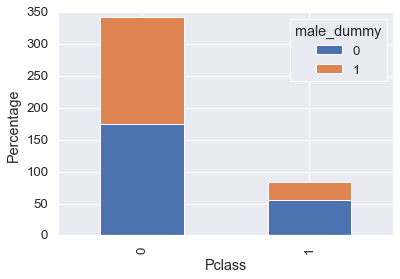

In [353]:
tab = pd.crosstab(df.instagram_dummy, df.male_dummy)
print (tab)

tab.plot(kind="bar", stacked=True)
plt.xlabel('Pclass')
plt.ylabel('Percentage')

In [26]:
# примерно такая картинка должна получиться

<AxesSubplot:xlabel='instagram_dummy'>

Правда ли, что девушки чаще указыают наличие инстаграмма на своей страничке?

__Ответ:__   Да, где-то в два раза чаще

#### Задание 16 [1]

Категориальная переменная обычно принимает значения из какого-то фиксированного множества. Например, переменная `political_cat` описывает к какой категории относятся политические взгляды юзера. Постройте для этой переменной столбиковую диаграмму. Разбиритесь по [документации](http://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot) как сделать у столбиков горизонтальное расположение. Можно ли сделать исходя из картинки вывод, что в вышке одни либералы? Почему? 

__Ответ:__  

In [371]:
sns.countplot(y="political_cat", data=df)
plt.show()

#### Задание 17 [1]

Как политические взгляды распределены по полам?  Постройте для этого также столбиковую диаграмму, на которой каждый стобик будет разбит на два цвета: мужчины и женщины. 

__Ответ:__  

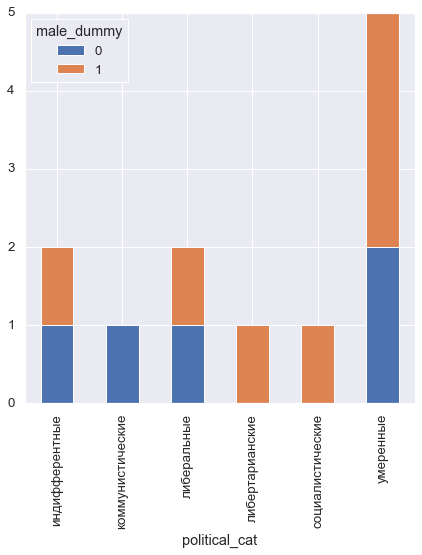

In [509]:
df_plot = df.groupby(['political_cat', 'male_dummy']).size().reset_index().pivot(index='political_cat', columns='male_dummy', values=0)
df_plot.plot(kind='bar', stacked=True, figsize=(7, 7))
plt.show()

In [31]:
# примерно такая картинка должна получиться

<AxesSubplot:xlabel='political_cat'>

#### Задание 18 [2]

Есть ли связь между неграмотностью и рождаемостью? Для 94 стран, уровень неграмотности женщин в которых больше 5%, известны доля неграмотных среди женщин старше 15 (на 2003 год) и средняя рождаемость на одну женщину (на 2005 год).

illiteracy.txt - датасет

Чему равен выборочный коэффициент корреляции Пирсона между этими двумя признаками? Округлите до четырёх знаков после десятичной точки.

In [374]:
df = pd.read_csv('../data/hm1_3/illiteracy.txt', sep='\t')
# df = pd.read_csv('illiteracy.txt', sep='\t')
df.head()

Country  Illit  Births
0  Albania   20.5    1.78
1  Algeria   39.1    2.44
2  Bahrain   15.0    2.34
3   Belize    5.9    2.97
4    Benin   73.5    5.60

Чему равен выборочный коэффициент корреляции Спирмена признаков из предыдущего вопроса? Округлите до четырёх знаков после десятичной точки.

In [387]:
# Spearman
format(df[['Illit','Births']].corr(method='spearman').Births.Illit, '.4f')

'0.7530'

In [386]:
# Pearson
format(df[['Illit','Births']].corr(method='pearson').Births.Illit, '.4f')

'0.7687'

In [ ]:
# Как оказалось, связь действительно есть